In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import auc, make_scorer,confusion_matrix
import math as ma

In [3]:
df = pd.read_excel(r'Datasets/usefile.xlsx')

In [4]:
df

,Gender Index,Age,Hypertension,Heart Disease,Martial Status,Work Type Index,Residence Type,Average Glucose Level,BMI,Smoking Status Index,Stroke
0,0,3.0,0,0,0,0,0,95.12,18.0,0,0
1,0,58.0,1,0,1,2,1,87.96,39.2,0,0
2,1,8.0,0,0,0,2,1,110.89,17.6,0,0
3,1,70.0,0,0,1,2,0,69.04,35.9,1,0
4,1,47.0,0,0,1,2,1,210.95,50.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,1,10.0,0,0,0,0,1,58.64,20.4,0,0
43396,1,56.0,0,0,1,4,1,213.61,55.4,1,0
43397,1,82.0,1,0,1,2,1,91.94,28.9,1,0
43398,0,40.0,0,0,1,2,1,99.16,33.2,0,0


In [5]:
df.shape

(43400, 11)

In [6]:
df.isnull().sum()

Gender Index             0
Age                      0
Hypertension             0
Heart Disease            0
Martial Status           0
Work Type Index          0
Residence Type           0
Average Glucose Level    0
BMI                      0
Smoking Status Index     0
Stroke                   0
dtype: int64

In [104]:
df.describe()

,Gender Index,Age,Hypertension,Heart Disease,Martial Status,Work Type Index,Residence Type,Average Glucose Level,BMI,Smoking Status Index,Stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,0.591866,42.217894,0.093571,0.047512,0.643733,2.119447,0.501290,104.482750,28.574551,0.475046,0.018041
std,0.492009,22.519649,0.291235,0.212733,0.478901,1.102323,0.500004,43.111751,7.639769,0.742823,0.133103
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.540000,23.400000,0.000000,0.000000
50%,1.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.580000,27.700000,0.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,112.070000,32.600000,1.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,291.050000,97.600000,2.000000,1.000000


<AxesSubplot:>

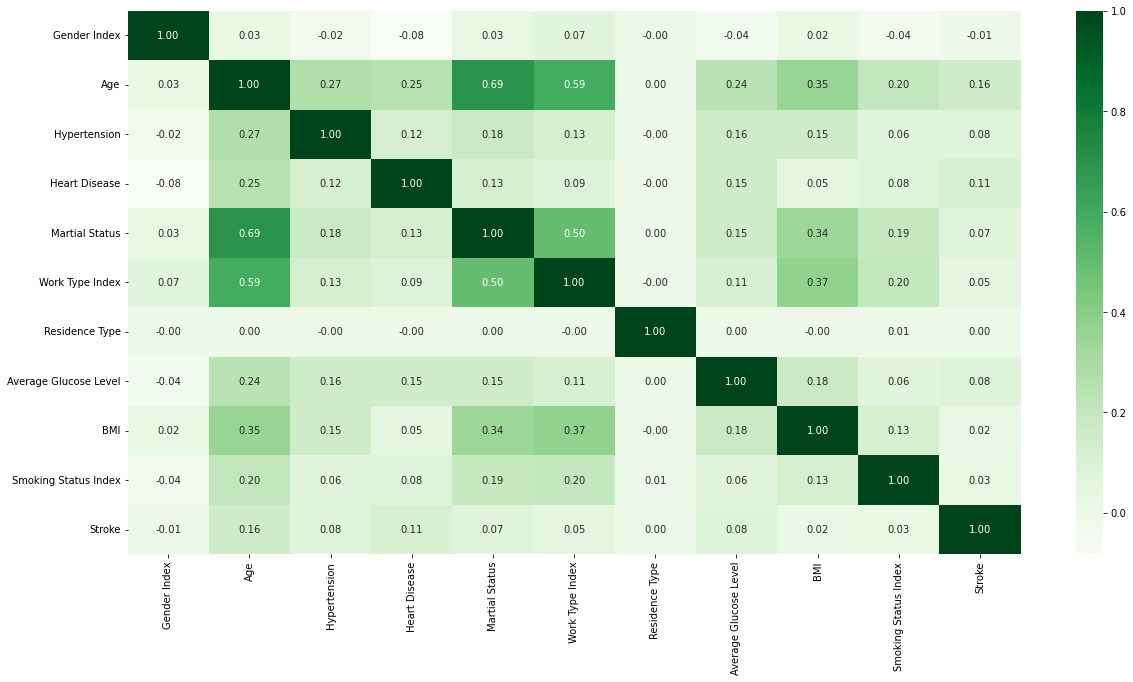

In [7]:
plt.rcParams['figure.figsize'] = (20,10)
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='Greens')

In [8]:
X = df.drop('Stroke',axis=1)
X.head()

,Gender Index,Age,Hypertension,Heart Disease,Martial Status,Work Type Index,Residence Type,Average Glucose Level,BMI,Smoking Status Index
0,0,3.0,0,0,0,0,0,95.12,18.0,0
1,0,58.0,1,0,1,2,1,87.96,39.2,0
2,1,8.0,0,0,0,2,1,110.89,17.6,0
3,1,70.0,0,0,1,2,0,69.04,35.9,1
4,1,47.0,0,0,1,2,1,210.95,50.1,0


In [9]:
y = df['Stroke']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Stroke, dtype: int64

In [10]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [11]:
X_scaled

array([[-1.20297175, -1.74151677, -0.32129564, ..., -0.21717647,
        -1.38416136, -0.63952169],
       [-1.20297175,  0.700823  ,  3.11239826, ..., -0.38325839,
         1.39082376, -0.63952169],
       [ 0.82953395, -1.51948588, -0.32129564, ...,  0.14862128,
        -1.43651957, -0.63952169],
       ...,
       [ 0.82953395,  1.76657127,  3.11239826, ..., -0.29093911,
         0.04259986,  0.70670915],
       [-1.20297175, -0.0984882 , -0.32129564, ..., -0.12346544,
         0.60545061, -0.63952169],
       [ 0.82953395,  1.76657127, -0.32129564, ..., -0.57995877,
        -1.04383299, -0.63952169]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state = 42, test_size = 0.3)

## KNN-without cross-validation

In [105]:
ma.sqrt(len(X_train))

174.29859437184226

In [26]:
optimal_k = ma.sqrt(len(X_train))
if (int(optimal_k)%2==0):
    optimal_k = int(optimal_k)+1

optimal_k

175

In [27]:
neighbors = range(3,optimal_k,2) #avoiding even k value to avoid ties of classification.

In [28]:
accuracy_ = []
roc_auc_val = []

In [29]:
for k in neighbors:
    
    #defining the model
    knn_ = KNeighborsClassifier(n_neighbors=k)
    knn_.fit(X_train, y_train)
    
    #Predictions on the test set
    y_pred = knn_.predict(X_test)
    
    #Accuracy 
    val = accuracy_score(y_test,y_pred)*100
    val = round(val,4)
    accuracy_.append(val)
    
    #ROC-AUC 
    y_pred_prob = knn_.predict_proba(X_test)
    roc_auc_ = roc_auc_score(y_test, y_pred_prob[:,1])
    roc_auc_val.append(roc_auc_)

In [30]:
data_KNN = {
    'K-value (Neigbhors)' : list(neighbors),
    'Accuracy' : accuracy_,
    'ROC_AUC_Score' : roc_auc_val
}


In [108]:
KNN_Results = pd.DataFrame(data_KNN)
KNN_Results

,K-value (Neigbhors),Accuracy,ROC_AUC_Score
0,3,97.9339,0.544102
1,5,98.1260,0.575207
2,7,98.1951,0.601236
3,9,98.1874,0.624923
4,11,98.1951,0.635065
...,...,...,...
81,165,98.1951,0.808958
82,167,98.1951,0.809098
83,169,98.1951,0.809824
84,171,98.1951,0.809470


In [106]:
KNN_Results.head(30)

,K-value (Neigbhors),Accuracy,ROC_AUC_Score
0,3,97.9339,0.544102
1,5,98.1260,0.575207
2,7,98.1951,0.601236
3,9,98.1874,0.624923
4,11,98.1951,0.635065
5,13,98.1951,0.655026
6,15,98.1951,0.665704
7,17,98.1951,0.672895
8,19,98.1951,0.682933
9,21,98.1951,0.689857


In [35]:
plt.rcParams['font.size'] = 14 

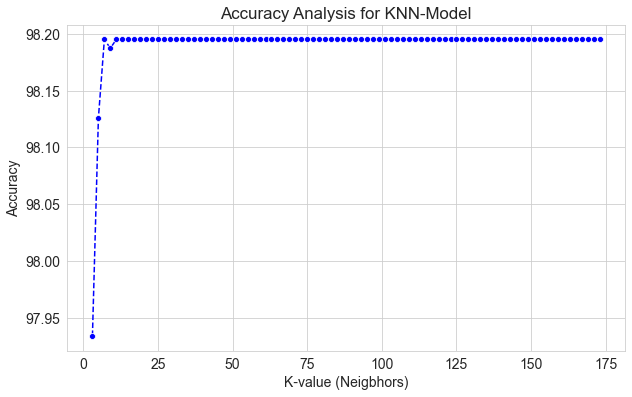

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(neighbors), y=accuracy_, marker='o', color='blue', linestyle = 'dashed')
plt.title('Accuracy Analysis for KNN-Model')
plt.xlabel('K-value (Neigbhors)')
plt.ylabel('Accuracy')
plt.show()

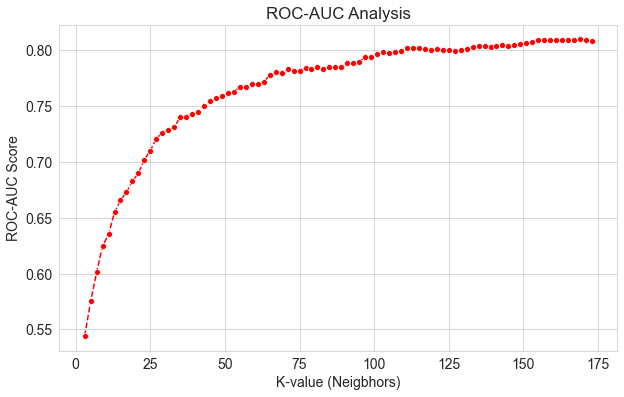

In [37]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(neighbors), y=roc_auc_val, marker='o', color='red', linestyle = 'dashed')
plt.title('ROC-AUC Analysis')
plt.xlabel('K-value (Neigbhors)')
plt.ylabel('ROC-AUC Score')
plt.show()

### Conf. Matrix ,and ROC-AUC for best performing KNN model with k value = 169, which has best accuracy

In [40]:
max_index = KNN_Results['ROC_AUC_Score'].idxmax()
row_with_max_value = KNN_Results.iloc[max_index]
row_with_max_value

K-value (Neigbhors)    169.000000
Accuracy                98.195100
ROC_AUC_Score            0.809824
Name: 83, dtype: float64

In [53]:
best_k = row_with_max_value[0]
best_k

169.0

In [55]:
knn_best = KNeighborsClassifier(n_neighbors=int(best_k))
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)
    
#ROC-AUC 
y_pred_prob = knn_best.predict_proba(X_test)
roc_auc_ = roc_auc_score(y_test, y_pred_prob[:,1])

In [56]:
cm_df = confusion_matrix(y_test,y_pred)
cm_df

array([[12785,     0],
       [  235,     0]], dtype=int64)

Text(0.5, -0.3, 'Confusion Matrix, for the best performing K-NN model, k = 169')

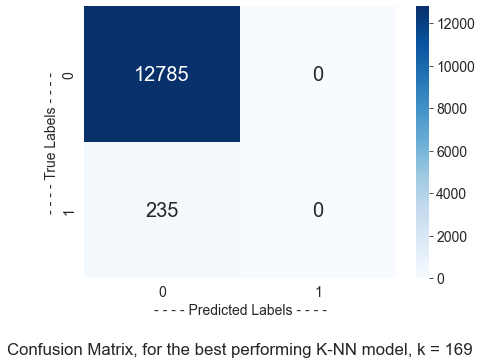

In [57]:
plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d',annot_kws={'size': 20})
# Set the axis labels and title
plt.xlabel('- - - - Predicted Labels - - - -')
plt.ylabel('- - - - True Labels - - - -')
plt.title('Confusion Matrix, for the best performing K-NN model, k = 169',y = -0.3,loc='center')

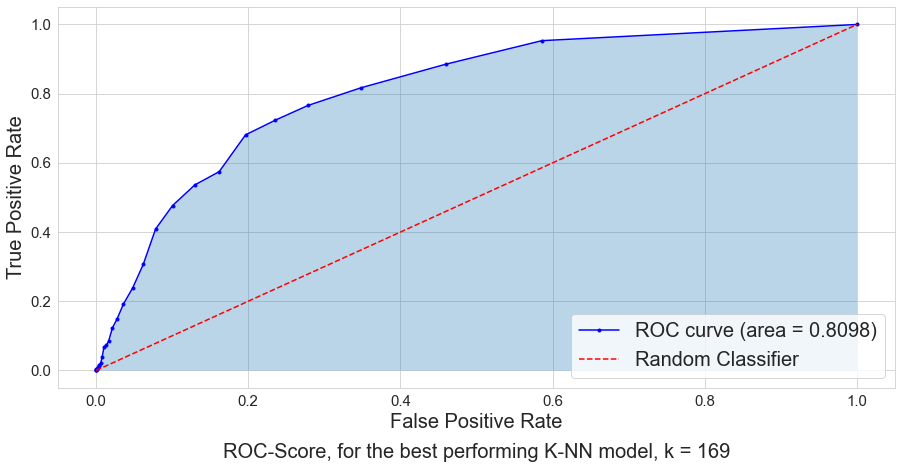

In [89]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(15,7))
plt.plot(fpr, tpr, marker = '.',color='blue', label='ROC curve (area = %0.4f)' % roc_auc )
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.fill_between(fpr, tpr, alpha=0.3)
plt.xlabel('False Positive Rate', fontsize = "20")
plt.ylabel('True Positive Rate', fontsize = "20")
plt.legend(loc="lower right", fontsize="20")
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.title('ROC-Score, for the best performing K-NN model, k = 169',y = -0.2,loc='center',fontsize='20')
plt.show()

## KNN-with cross-validation

In [64]:
neighbors

range(3, 175, 2)

In [65]:
accuracy_cv = []
roc_auc_val_cv = []
fit_time_cv = []
score_time_cv = []

In [66]:
for k in neighbors:
    
    #defining the model
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    
    #K-Fold Cross Validation with Accuracy and ROC-AUC
    cv_scores = cross_validate(knn_cv, X_scaled, y,cv = 5, scoring = ['accuracy','roc_auc'])
    
    #extracting the values
    accuracy_scores = cv_scores['test_accuracy']
    roc_auc_scores = cv_scores['test_roc_auc']
    fit_time_scores = cv_scores['fit_time']
    score_time_scores = cv_scores['score_time']
    
    accuracy_cv.append(np.mean(accuracy_scores))
    roc_auc_val_cv.append(np.mean(roc_auc_scores))
    fit_time_cv.append(np.mean(fit_time_scores))
    score_time_cv.append(np.mean(score_time_scores))

In [67]:
for i in range(len(accuracy_cv)):
    accuracy_cv[i] *= 100

In [73]:
data_KNN_CV = {
    'K-value (Neigbhors)' : list(neighbors),
    'Accuracy_CV' : accuracy_cv,
    'ROC_AUC_Score_CV' : roc_auc_val_cv,
    'Model_Fit Time' : fit_time_cv,
    'Score Time' : score_time_cv,
}


In [74]:
KNN_CV_Results = pd.DataFrame(data_KNN_CV)
KNN_CV_Results

,K-value (Neigbhors),Accuracy_CV,ROC_AUC_Score_CV,Model_Fit Time,Score Time
0,3,97.958525,0.557739,0.069335,1.310647
1,5,98.142857,0.582070,0.067640,1.534843
2,7,98.182028,0.600546,0.068028,1.615794
3,9,98.191244,0.621195,0.065797,1.752560
4,11,98.195853,0.637252,0.068917,1.912581
...,...,...,...,...,...
81,165,98.195853,0.821042,0.093364,8.697368
82,167,98.195853,0.821333,0.101701,8.598774
83,169,98.195853,0.821446,0.091445,8.467856
84,171,98.195853,0.822070,0.089803,8.516263


In [75]:
max_index1 = KNN_CV_Results['ROC_AUC_Score_CV'].idxmax()
row_with_max_value1 = KNN_CV_Results.iloc[max_index1]
row_with_max_value1

K-value (Neigbhors)    173.000000
Accuracy_CV             98.195853
ROC_AUC_Score_CV         0.822290
Model_Fit Time           0.100490
Score Time               8.985297
Name: 85, dtype: float64

In [77]:
knn_cv_best = KNeighborsClassifier(n_neighbors=173)

In [83]:
pred_prob_cv = cross_val_predict(knn_cv_best, X_scaled, y, cv=5, method='predict_proba')

# Extract positive class probabilities for ROC curve
positive_prob = pred_prob_cv[:, 1]

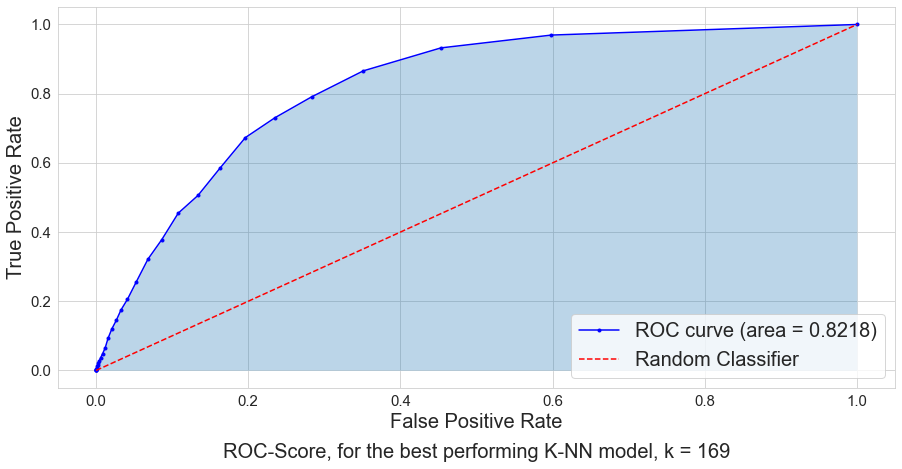

In [88]:
fpr, tpr, _ = roc_curve(y, positive_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(15,7))
plt.plot(fpr, tpr, marker = '.',color='blue', label='ROC curve (area = %0.4f)' % roc_auc )
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.fill_between(fpr, tpr, alpha=0.3)
plt.xlabel('False Positive Rate', fontsize = "20")
plt.ylabel('True Positive Rate', fontsize = "20")
plt.legend(loc="lower right", fontsize="20")
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.title('ROC-Score, for the best performing K-NN model, k = 169',y = -0.2,loc='center',fontsize='20')
plt.show()

In [126]:
KNN_CV_Results.to_csv('Datasets/KNN_CV_Results.csv',index=False)

In [123]:
#make table for the above data.

### Accuracy Analysis

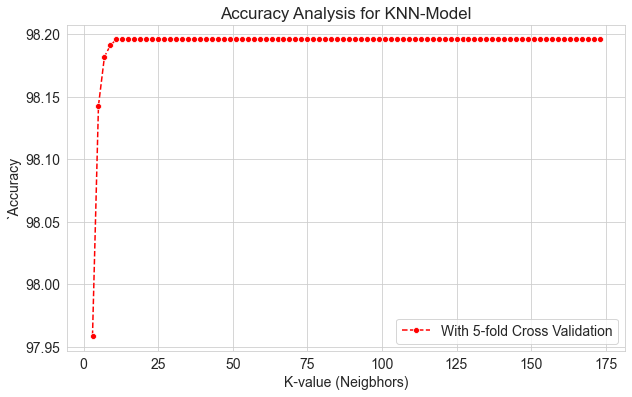

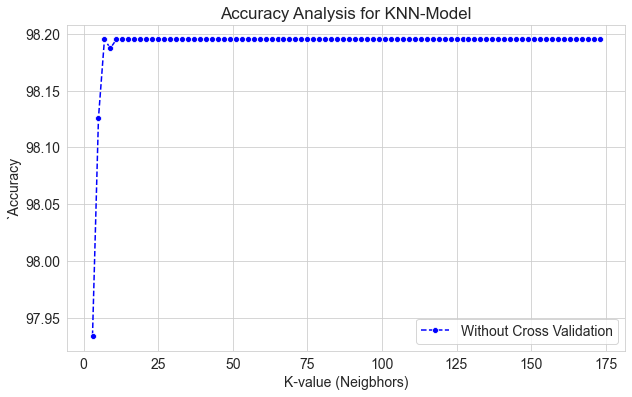

In [91]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(neighbors), y=accuracy_cv, marker='o', color='red', linestyle = 'dashed', label='With 5-fold Cross Validation')
plt.title('Accuracy Analysis for KNN-Model')
plt.xlabel('K-value (Neigbhors)')
plt.ylabel('`Accuracy')
plt.legend()
plt.show()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(neighbors), y=accuracy_, marker='o', color='blue', linestyle = 'dashed', label='Without Cross Validation')
plt.title('Accuracy Analysis for KNN-Model')
plt.xlabel('K-value (Neigbhors)')
plt.ylabel('`Accuracy')
plt.legend()
plt.show()

### ROC-AUC Analysis

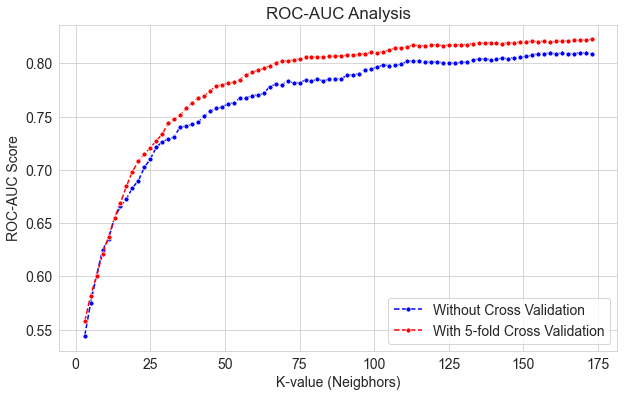

In [103]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(neighbors), y=roc_auc_val, marker='o', markersize=5, color='blue', linestyle = 'dashed', label='Without Cross Validation')
sns.lineplot(x=list(neighbors), y=roc_auc_val_cv, marker='o', markersize=5, color='red', linestyle = 'dashed', label='With 5-fold Cross Validation')
plt.title('ROC-AUC Analysis')
plt.xlabel('K-value (Neigbhors)')
plt.ylabel('ROC-AUC Score')
plt.show()